In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import numpy.linalg as lin
import scipy as sp
import scipy.optimize as opt
import random
import time
from numpy import exp, log
from numba.decorators import jit

In [2]:
%precision 3
np.set_printoptions(precision=3)

# Gradient Descent
## Tasks 4,5,6,7

In [3]:
def E_du_dv(u, v, eta):
    ww = (u * exp(v) - 2 * v * exp(-u))
    E = ww ** 2
    Eu = 2 * ww * (exp(v) + 2 * v * exp(-u))
    Ev = 2 * ww * (u * exp(v) - 2 * exp(-u))
    du, dv = -eta * Eu, -eta * Ev
    return E, du, dv

In [4]:
def task4():
    u,v = 1,1
    eta = 0.1
    Ethreshold = 1e-14
    step = 0
    while True:
        E, du, dv = E_du_dv(u, v, eta)
        print('{:2d} -> (u,v) = ({:.3f}, {:.3f}) E = {:.1e}'.format(step, u, v, E))
        if E < Ethreshold:  break
        u,v = u+du, v+dv
        step += 1
    return u,v,step
task4()

 0 -> (u,v) = (1.000, 1.000) E = 3.9e+00
 1 -> (u,v) = (-0.370, 0.214) E = 1.2e+00
 2 -> (u,v) = (0.031, -0.508) E = 1.0e+00
 3 -> (u,v) = (0.108, -0.122) E = 9.9e-02
 4 -> (u,v) = (0.066, -0.015) E = 8.7e-03
 5 -> (u,v) = (0.048, 0.018) E = 1.8e-04
 6 -> (u,v) = (0.045, 0.023) E = 1.3e-06
 7 -> (u,v) = (0.045, 0.024) E = 7.3e-09
 8 -> (u,v) = (0.045, 0.024) E = 4.0e-11
 9 -> (u,v) = (0.045, 0.024) E = 2.2e-13
10 -> (u,v) = (0.045, 0.024) E = 1.2e-15


(0.045, 0.024, 10)

In [5]:
def task4b():
    u,v = 1,1
    eta = 0.1
    for step in range(16):
        E, du, dv = E_du_dv(u, v, eta)
        print('{:2d} -> (u,v) = ({:.3f}, {:.3f}) E = {:.1e}'.format(step, u, v, E))
        u,v = u+du, v+dv
task4b()

 0 -> (u,v) = (1.000, 1.000) E = 3.9e+00
 1 -> (u,v) = (-0.370, 0.214) E = 1.2e+00
 2 -> (u,v) = (0.031, -0.508) E = 1.0e+00
 3 -> (u,v) = (0.108, -0.122) E = 9.9e-02
 4 -> (u,v) = (0.066, -0.015) E = 8.7e-03
 5 -> (u,v) = (0.048, 0.018) E = 1.8e-04
 6 -> (u,v) = (0.045, 0.023) E = 1.3e-06
 7 -> (u,v) = (0.045, 0.024) E = 7.3e-09
 8 -> (u,v) = (0.045, 0.024) E = 4.0e-11
 9 -> (u,v) = (0.045, 0.024) E = 2.2e-13
10 -> (u,v) = (0.045, 0.024) E = 1.2e-15
11 -> (u,v) = (0.045, 0.024) E = 6.6e-18
12 -> (u,v) = (0.045, 0.024) E = 3.6e-20
13 -> (u,v) = (0.045, 0.024) E = 2.0e-22
14 -> (u,v) = (0.045, 0.024) E = 1.1e-24
15 -> (u,v) = (0.045, 0.024) E = 6.0e-27


In [6]:
def task7():
    u,v = 1,1
    eta = 0.1
    for step in range(16):
        E, _, _ = E_du_dv(u, v, eta)
        print('{:2d} -> (u,v) = ({:.3f}, {:.3f}) E = {:.1e}'.format(step, u, v, E))
        _, du, _ = E_du_dv(u, v, eta)
        u += du
        _, _, dv = E_du_dv(u, v, eta)
        v += dv
    print('E = %.1e' % E)
    return E
task7()

 0 -> (u,v) = (1.000, 1.000) E = 3.9e+00
 1 -> (u,v) = (-0.370, -2.040) E = 3.4e+01
 2 -> (u,v) = (6.392, -2.179) E = 5.3e-01
 3 -> (u,v) = (6.377, -2.283) E = 4.3e-01
 4 -> (u,v) = (6.365, -2.368) E = 3.7e-01
 5 -> (u,v) = (6.354, -2.440) E = 3.2e-01
 6 -> (u,v) = (6.345, -2.501) E = 2.8e-01
 7 -> (u,v) = (6.338, -2.556) E = 2.5e-01
 8 -> (u,v) = (6.331, -2.605) E = 2.3e-01
 9 -> (u,v) = (6.325, -2.649) E = 2.1e-01
10 -> (u,v) = (6.319, -2.689) E = 1.9e-01
11 -> (u,v) = (6.314, -2.727) E = 1.8e-01
12 -> (u,v) = (6.309, -2.761) E = 1.7e-01
13 -> (u,v) = (6.305, -2.794) E = 1.6e-01
14 -> (u,v) = (6.301, -2.824) E = 1.5e-01
15 -> (u,v) = (6.297, -2.852) E = 1.4e-01
E = 1.4e-01


0.140

# Logistic regression
### Tasks 8,9

In [7]:
def random_points(n, vmin=-1., vmax=+1.):
    vec_xy = rnd.random_sample([n,2]) * (vmax-vmin) + vmin
    return np.concatenate((np.ones([n,1]), vec_xy), axis=1)

def random_line():
    p = random_points(2)
    a = (p[1,2] - p[0,1]) / (p[1,1] - p[0,1])
    b = p[0,2] - a * p[0,1]
    return np.array([-b, -a, 1.])

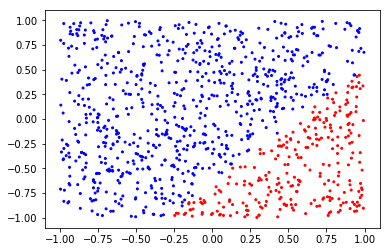

In [9]:
w_goal = random_line()
x_samp = random_points(100)
y_samp = np.sign(x_samp @ w_goal)
x_many = random_points(1000)
y_many = np.sign(x_many @ w_goal)
assert (y_samp==0).sum() + (y_many==0).sum()==0
plt.scatter(x_many[:,1], x_many[:,2], c=np.where(y_many>0, ['b'], ['r']), s=4)

In [50]:
@jit
def logreg_epoch_sum(perm_n, x, y, w, eta):
    w0 = w
    for n in perm_n:
        xn, yn = x[n], y[n]
        grad_n = -yn * xn / (1 + exp(yn * (xn @ w)))
        w = w - eta * grad_n
    return w - w0

@jit
def logreg_epoch_avg(perm_n, x, y, w, eta):
    dw_all = np.zeros([len(perm_n), len(w)])
    for n in perm_n:
        xn, yn = x[n], y[n]
        grad_n = -yn * xn / (1 + exp(yn * (xn @ w)))
        dw_all[n] = -eta * grad_n
    return dw_all.mean(axis=0)

def logreg_run(x, y, method):
    w_eps = 0.01
    eta = 0.01
    max_iter = 10000
    w = np.zeros([3])
    ok = False

    logreg_epoch_func = {'sum':logreg_epoch_sum, 'avg':logreg_epoch_avg}[method]

    N = len(x)
    perm_n = list(range(N))

    for step in range(max_iter):
        random.shuffle(perm_n)
        dw = logreg_epoch_func(perm_n, x, y, w, eta)
        if lin.norm(dw) < w_eps:
            ok = True
            break
        w = w + dw
    return ok, step, w

def tasks_logreg(method='sum', disp=False, shuffle=True, Nrun=100, Nsamp=100, x_all=None, y_all=None, w_tgt=None):
    if x_all is None:
        w_tgt = random_line()
        x_all = random_points(1000)
        y_all = np.sign(x_all @ w_tgt)
        assert np.sum(y_all==0) == 0

    Nall = len(x_all)
    idx_all = list(range(Nall))

    ok_ = np.empty(Nrun)
    niter_ = np.empty(Nrun)
    w_ = np.empty([Nrun,3])
    eout_ = np.empty([Nrun])
    time_0 = time.clock()

    for i in range(Nrun):
        if shuffle:
            random.shuffle(idx_all)
        x_s, y_s = x_all[idx_all[:Nsamp]], y_all[idx_all[:Nsamp]]
        x_v, y_v = x_all[idx_all[Nsamp:]], y_all[idx_all[Nsamp:]]

        ok_i, niter_i, w_i = logreg_run(x_s, y_s, method)

        ok_[i] = ok_i
        niter_[i] = niter_i
        w_[i] = w_i / w_i[-1]
        eout_[i] = log(exp(- x_v @ w_i * y_v) + 1).mean()

        if i > 1:
            ok_m, niter_m, eout_m = ok_[:i].mean(), niter_[:i].mean(), eout_[:i].mean()
            w_m = w_[:i].mean(axis=0)
            sec_left = (time.clock() - time_0) * (Nrun - i) / i
        if i > 1 and i % 10 == 0 and disp:
            print('{i:3d}: niter:{niter_m:.1f} eout:{eout_m:.3f} left:{sec_left:.0f}s'.format(**locals()))

    return ok_m, niter_m, eout_m, w_m, w_tgt

In [51]:
task8(x_all=x_many, y_all=y_many, w_tgt=w_goal)

(1.000,
 360.879,
 0.097,
 array([ 0.663, -1.205,  1.   ]),
 array([ 0.653, -1.159,  1.   ]))

In [52]:
task8(shuffle=False, x_all=x_many, y_all=y_many, w_tgt=w_goal)

(1.000,
 401.960,
 0.087,
 array([ 0.572, -1.132,  1.   ]),
 array([ 0.653, -1.159,  1.   ]))

In [53]:
task8()

(1.000,
 341.394,
 0.097,
 array([-0.332, -0.137,  1.   ]),
 array([-0.342, -0.164,  1.   ]))

In [44]:
# broken!
#task8(method='avg', Nrun=100, x_all=x_many, y_all=y_many, w_tgt=w_goal)

# PLA as SGD
### Task 10

In [144]:
def pla_run(x, y, normalize=False):
    ok = False
    w = np.zeros(3)
    e_arr = []

    for step in range(10000):
        e = -y * (x @ w)  # <-- minimize this error function
        e_arr.append(e.sum())
        ei = np.where(e >= 0)[0]
        if not ei.size:
            ok = True
            break
        i = rnd.choice(ei)
        w += y[i] * x[i]

    if not ok:
        step = -step
    if normalize:
        w /= w[-1]
    return w, step, np.array(e_arr)

def pla_test(x_samp, y_samp, x_ver=None, y_ver=None, normalize=False):
    if x_ver is None:
        x_ver, y_ver = x_samp, y_samp
    w, niter, e_arr = pla_run(x_samp, y_samp, normalize=normalize)
    h = np.sign(x_ver @ w)
    eout = np.mean(np.abs(np.sign(h - y_ver)))
    return niter, eout, w

#w_goal, *pla_run(x_many, y_many)

In [150]:
*pla_test(x_samp, y_samp, x_many, y_many, normalize=True), w_goal

(81, 0.010, array([ 0.664, -1.107,  1.   ]), array([ 0.653, -1.159,  1.   ]))

In [151]:
*pla_test(x_many, y_many, normalize=False), w_goal

(369, 0.000, array([  7.  , -12.57,  10.74]), array([ 0.653, -1.159,  1.   ]))